# Titanic ML

## Let's import the data

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset
train_dataset = pd.read_csv("datasets/Titanic/train.csv", sep=",")
test_dataset = pd.read_csv("datasets/Titanic/test.csv", sep=",") 
gender_submission = pd.read_csv("datasets/Titanic/gender_submission.csv", sep=",")

train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
print(train_dataset.shape)
print(test_dataset.shape)
print(gender_submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [5]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Test dataset is 1 column short, and that's is survived or not. We will have to predict that, and check with the information in gender_submisstion**

## Learn more about the data 

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check for missing values**

In [7]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Or we can visulize it**

In [11]:
!pip install missingno

In [90]:
!pip install chart_studio

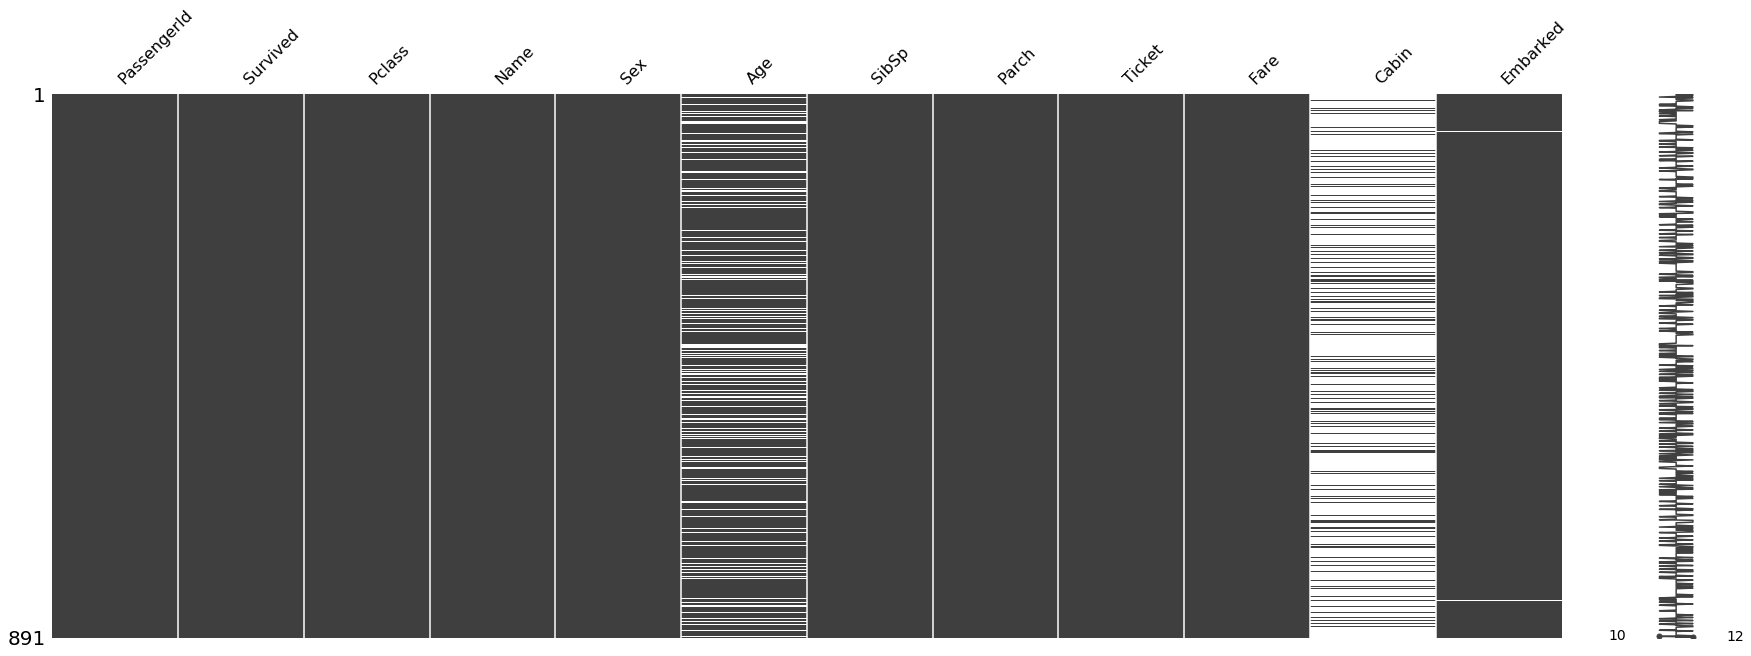

In [275]:
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

missingno.matrix(train_dataset, figsize = (30,10))

## Feature Engineering

### This is a very important step 

First we will make some plots to get a better idea of how our data looks like

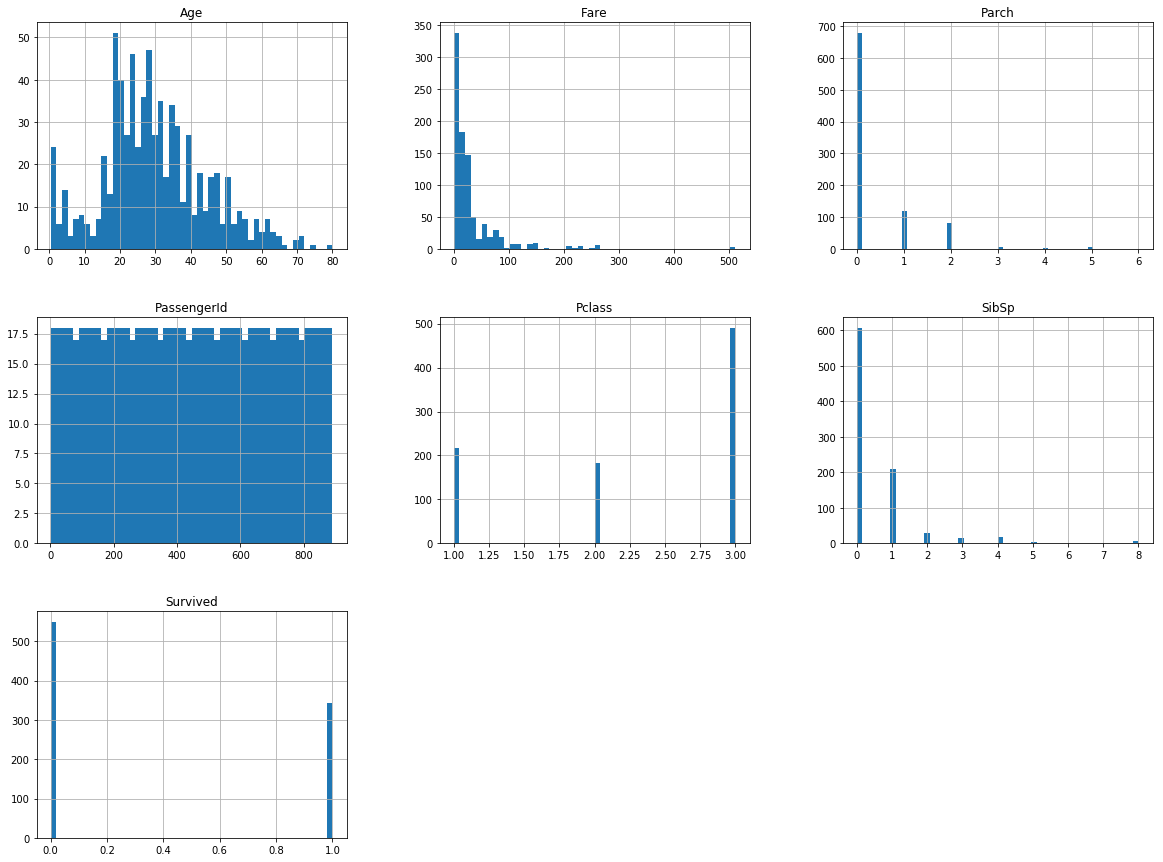

In [47]:
# visualize data
train_dataset.hist(bins = 50, figsize=(20,15))
plt.show()

Now we want to see the correlation between features 

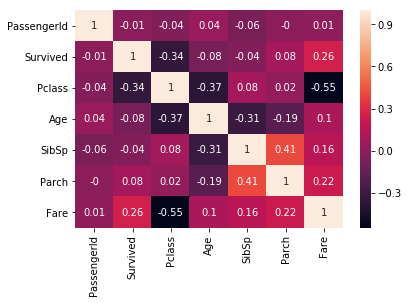

In [48]:
# compute the pair wise correlation for all columns 
# corr() is the function name, round() is how many digit we want to round our values up
correlation_matrix = train_dataset.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [13]:
train_dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Decide which feature matters**

In [ ]:
# compute the pair wise correlation for all columns 
# corr() is the function name, round() is how many digit we want to round our values up
correlation_matrix = df.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Target Feature: Survived 

Description: Whether the passenger survived or not.

Key: 0 = did not survive, 1 = survived

This is obviously a categorical data type (even though is is int type)

In [25]:
survived = train_dataset.iloc[:, 1]
survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [28]:
unique, counts = np.unique(survived, return_counts=True)
dict(zip(unique, counts))

{0: 549, 1: 342}

So 549 people died, and only 342 people survived

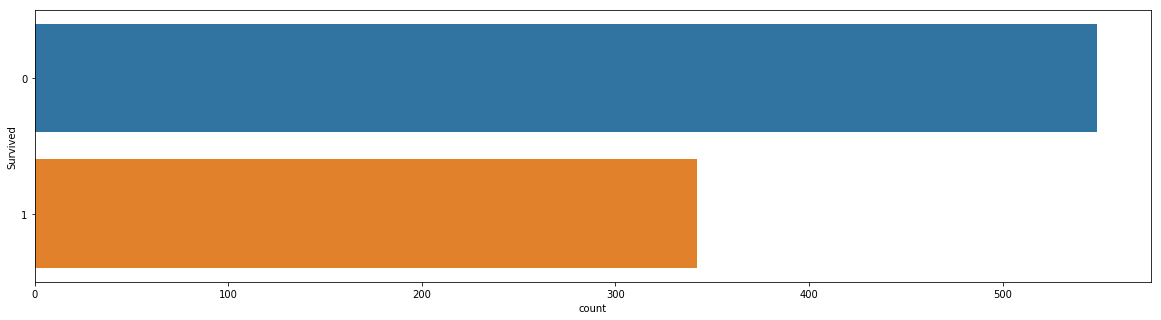

In [41]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='Survived', data=train_dataset);

### Pclass: class ticket

This also seems to be an important feature

This is also another categorical data type

In [37]:
ticket_class = train_dataset.iloc[:, 2]

unique, counts = np.unique(ticket_class, return_counts=True)
dict(zip(unique, counts))

{1: 216, 2: 184, 3: 491}

So there are 216 passengers in 1st class, 184 passengers in 2nd class and 491 passengers in 3rd class 

In [45]:
ticket_class.isnull().sum()

0

Perfect there is no missing value. This seems to be a very impotant factor to decide weather or not if a passenger survives. 

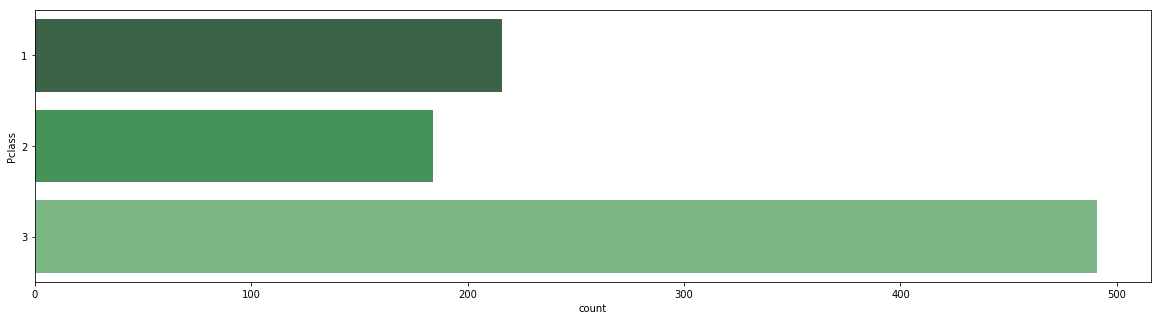

In [42]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y = ticket_class, palette="Greens_d")

**The next feature is name, but I don't think this is important in deciding the survive probability so I will skip it**

### Sex

In [50]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
sex = train_dataset.iloc[:, 4]
sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [54]:
sex.isnull().sum()

0

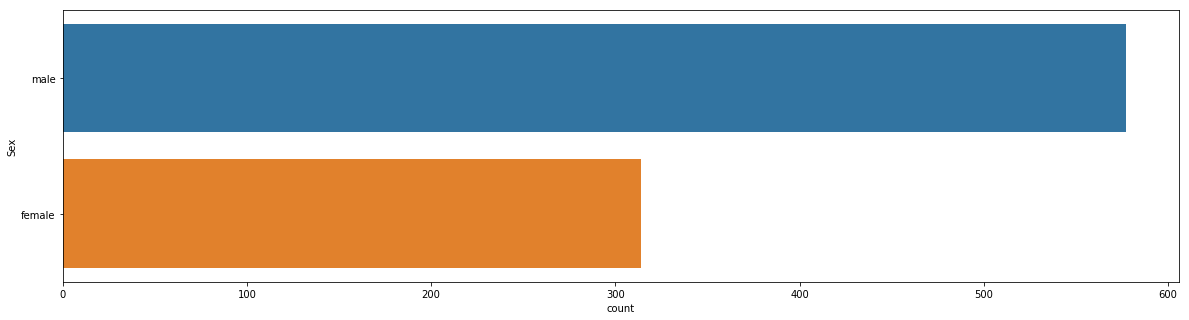

In [55]:
plt.figure(figsize=(20, 5))
sns.countplot(y=sex)

**As I have said above, sex seems to be a pretty important feature. So let's see the correlation between this feature and survived**

First, let do this in df data type because it has a lot of cool built-in functions 

In [56]:
df_cat = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

Change 'male' and 'female' into 0 and 1 so we can so correlation 

In [63]:
# add Survived and Sex to the subset dataframes
df_cat['Sex'] = sex
df_cat['Survived'] = survived
df_cat['Sex'] = np.where(df_cat['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female
df_cat['Sex'].head()
#df_con['Sex'] = train['Sex']

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int32

Ok now sex is int data type

**Now let's see the correlation between sex and survived**

In [64]:
df_cat

,Sex,Survived
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,1,1
9,1,1


In [66]:
df_cat['Sex'].corr(df_cat['Survived'])

0.5433513806577551

Ha so 0.54 is not bad at all. So far, sex is the feature that is most correlated with survived

**Let's add other features in our df so later on we can have a nice correlation matrix.**

In [70]:
df_cat['Passenger Class'] = ticket_class
df_cat

,Sex,Survived,Passenger Class
0,0,0,3
1,1,1,1
2,1,1,3
3,1,1,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,1,1,3
9,1,1,2


**Visualization**

In [276]:
fig = go.Figure(data=[
    go.Bar(name='Survived', x=df_cat['Sex'], y=df_cat['Survived'].where(df_cat['Survived'] == 1)),
    go.Bar(name='Died', x=df_cat['Sex'], y=df_cat['Survived'].where(df_cat['Survived'] == 0))
])
# Change the bar mode
fig.update_layout(barmode='stack')
#fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
#                  marker_line_width=1.5, opacity=0.6)
fig.show()

### Feature: Age 

Age also sounds like a great feature to predict survive probability. However, we run into a big problem here

In [81]:
train_dataset.Age.isnull().sum()

177

Out of almost 900 data points in the train dataset, we have almost 200 null data points. What should we do with them? 

For now, because of the time limit, I will just gonna replace them with the average. During the break or whenever I have more free time, I will come up with something better.

In [274]:
import plotly.express as px
tips = px.data.tips()
fig = px.histogram(tips, x=train_dataset['Age'], nbins=40)
fig.show()

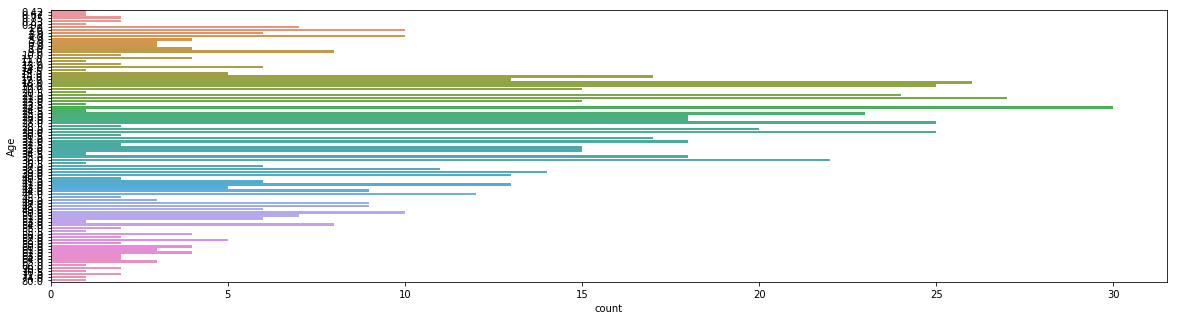

In [84]:
plt.figure(figsize=(20, 5))
sns.countplot(y=train_dataset['Age']) 

**Let's try to replace missing values with the mean**

In [100]:
age = train_dataset['Age']
mean_age = np.mean(age)
age = age.fillna(mean_age)

In [101]:
age.isnull().sum()

0

Add age into our df

Since age is a continous data, also add it into df_con

In [115]:
df_con['Age'] = age

**Now we can see the correlation between survived and age**

In [123]:
df_con['Age'].corr(df_cat['Survived'])

-0.06980851528714313

Not so helpful I guess:(

### Feature: Number of Siblings or Spouses

In [117]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
train_dataset.SibSp.isnull().sum()

0

In [119]:
train_dataset.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [120]:
df_cat['SibSp'] = train_dataset['SibSp']
df_con['SibSp'] = train_dataset['SibSp']

In [124]:
tips = px.data.tips()
fig = px.histogram(tips, x=train_dataset['SibSp'])
fig.show()

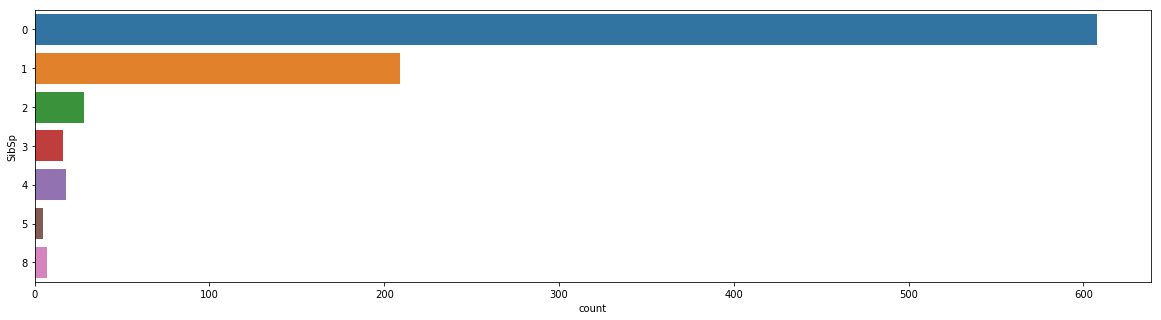

In [125]:
plt.figure(figsize=(20, 5))
sns.countplot(y=train_dataset['SibSp']) 

### Feature: Parent/Children

Description: The number of parents/children the passenger has aboard the Titanic.

In [140]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
train_dataset.Parch.isnull().sum()

0

In [144]:
train_dataset.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [146]:
# Add Parch to subset dataframes
df_cat['Parch'] = train_dataset['Parch']
df_con['Parch'] = train_dataset['Parch']

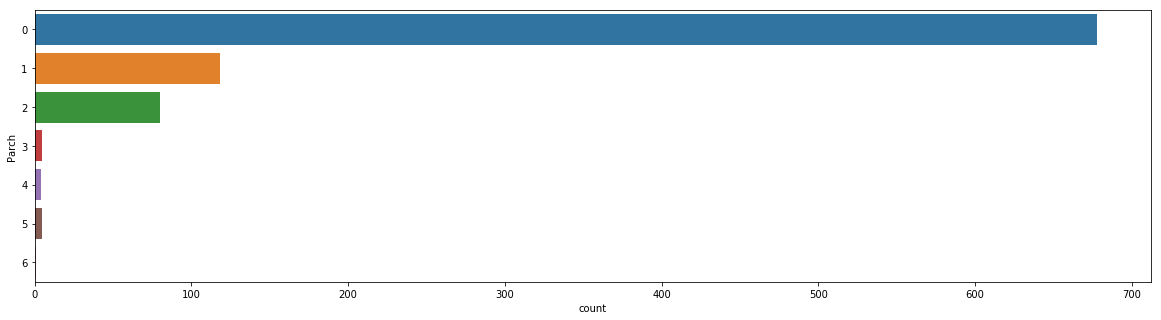

In [147]:
plt.figure(figsize=(20, 5))
sns.countplot(y=train_dataset['Parch']) 

### Feature: Embarked

In [127]:
train_dataset.Embarked.isnull().sum()

2

In [129]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

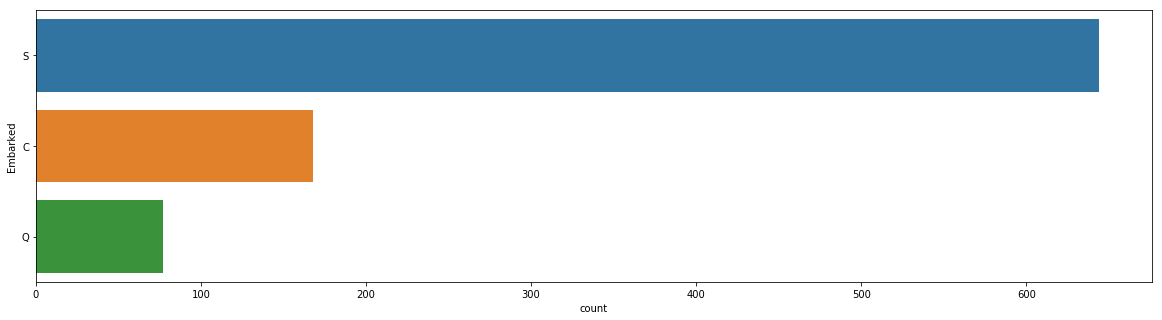

In [131]:
plt.figure(figsize=(20, 5))
sns.countplot(y='Embarked', data=train_dataset)

**Since this is a categorical data type, I will add it into the cat_df**

In [132]:
df_cat['Embarked'] = train_dataset['Embarked']
df_cat

,Sex,Survived,Passenger Class,SibSp,Embarked
0,0,0,3,1,S
1,1,1,1,1,C
2,1,1,3,0,S
3,1,1,1,1,S
4,0,0,3,0,S
5,0,0,3,0,Q
6,0,0,1,0,S
7,0,0,3,3,S
8,1,1,3,0,S
9,1,1,2,1,C


## Build Machine Learning Models

In machine learning projects, one important part is feature engineering. It is very common to see categorical features in a dataset. However, our machine learning algorithm can only read numerical values. It is essential to encoding categorical features into numerical values.

In [149]:
df_cat.head()

,Sex,Survived,Passenger Class,SibSp,Embarked,Parch
0,0,0,3,1,S,0
1,1,1,1,1,C,0
2,1,1,3,0,S,0
3,1,1,1,1,S,0
4,0,0,3,0,S,0


In [151]:
one_hot_cols = df_cat.columns.tolist()
one_hot_cols

['Sex', 'Survived', 'Passenger Class', 'SibSp', 'Embarked', 'Parch']

In [150]:
# One-hot encode categorical variables
one_hot_cols = df_cat.columns.tolist()
one_hot_cols.remove('Survived')
df_cat_enc = pd.get_dummies(df_cat, columns=one_hot_cols)

df_cat_enc.head()

,Survived,Sex_0,Sex_1,Passenger Class_1,Passenger Class_2,Passenger Class_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_C,Embarked_Q,Embarked_S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
1,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1,0,1,1,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,1,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


One hot encode the categorical columns

In [154]:
df_con.head()

,Age,SibSp,Parch
0,22.0,1,0
1,38.0,1,0
2,26.0,0,0
3,35.0,1,0
4,35.0,0,0


In [157]:
df_con['Survived'] = train_dataset['Survived']

In [158]:
df_con.head()

,Age,SibSp,Parch,Survived
0,22.0,1,0,0
1,38.0,1,0,1
2,26.0,0,0,1
3,35.0,1,0,1
4,35.0,0,0,0


In [155]:
df_embarked_one_hot = pd.get_dummies(df_cat['Embarked'], prefix='embarked')
df_embarked_one_hot.head()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [161]:
df_cat.head()

,Sex,Survived,Passenger Class,SibSp,Embarked,Parch
0,0,0,3,1,S,0
1,1,1,1,1,C,0
2,1,1,3,0,S,0
3,1,1,1,1,S,0
4,0,0,3,0,S,0


In [234]:
df_sex_one_hot = pd.get_dummies(df_cat['Sex'], prefix='sex')

df_pclass_one_hot = pd.get_dummies(df_cat['Passenger Class'], prefix='Passenger Class')

df_pclass_one_hot.shape

(891, 3)

In [165]:
df_con_enc = pd.concat([df_cat, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_pclass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Passenger Class', 'Sex', 'Embarked'], axis=1)

In [166]:
df_con_enc.head()

,Survived,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,Passenger Class_1,Passenger Class_2,Passenger Class_3
0,0,1,0,0,0,1,1,0,0,0,1
1,1,1,0,1,0,0,0,1,1,0,0
2,1,0,0,0,0,1,0,1,0,0,1
3,1,1,0,0,0,1,0,1,1,0,0
4,0,0,0,0,0,1,1,0,0,0,1


**Ok now that our data is converted to number, we can run multiple ML algo on it now**

First, let split the dataset into X and y_label

In [168]:
X_train = df_con_enc.drop('Survived', axis=1) # data
y_train = df_con_enc.Survived # labels

In [169]:
print(X_train.shape)
print(y_train.shape)

(891, 10)
(891,)


**Now let's write one function so we can fit all the ML algo to the train data**

In [176]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [179]:
import sklearn.model_selection as ms

def the_one_that_does_it_all(algo, X_train, y_train, cv): 
    model = algo.fit(X_train, y_train)
    accuracy_model = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = ms.cross_val_predict(algo, X_train, y_train, cv=cv)
    
    # Cross-validation accuracy metric
    accuracy_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, accuracy_model, accuracy_cv

In [185]:
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression

In [186]:
train_pred_log, acc_log, acc_cv_log = the_one_that_does_it_all(LogisticRegression(), X_train, y_train, 10)

print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 79.24
Accuracy CV 10-Fold: 78.23


### K-Nearest Neighbours

In [183]:
train_pred_knn, acc_knn, acc_cv_knn = the_one_that_does_it_all(KNeighborsClassifier(), X_train, y_train, 10)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 82.15
Accuracy CV 10-Fold: 80.58


### Linear Support Vector Machines (SVC)

In [187]:
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = the_one_that_does_it_all(LinearSVC(), X_train, y_train, 10)

print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

Accuracy: 80.13
Accuracy CV 10-Fold: 79.35


### Stochastic Gradient Descent

In [188]:
train_pred_sgd, acc_sgd, acc_cv_sgd = the_one_that_does_it_all(SGDClassifier(), X_train, y_train, 10)

print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 76.09
Accuracy CV 10-Fold: 67.45


### Decision Tree Classifier

In [189]:
train_pred_dt, acc_dt, acc_cv_dt = the_one_that_does_it_all(DecisionTreeClassifier(), X_train, y_train, 10)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 83.73
Accuracy CV 10-Fold: 79.8


### Now it's time to decide which one is the winner

**The cross-validation metrics give us a more trustworthy result because the metrics we get from .fit() can randomly score higher than usual.**

Let's put all the results into a chart so it's easier to see

In [191]:
cv_df = pd.DataFrame({
    'Model' : ['Logistic Regression', 'K-Nearest Neighbours', 'Linear Support Vector Machines', 
               'Stochastic Gradient Descent', 'Decision Tree Classifier'],
    'Score CV': [acc_cv_log, acc_cv_knn, acc_cv_linear_svc, acc_cv_sgd, acc_cv_dt]
})

cv_df.sort_values(by='Score CV', ascending=False)

,Model,Score CV
1,K-Nearest Neighbours,80.58
4,Decision Tree Classifier,79.80
2,Linear Support Vector Machines,79.35
0,Logistic Regression,78.23
3,Stochastic Gradient Descent,67.45


**So K-Nearest Neighbours gives us a highest cv accuracy. Let use this algorithm to for our submission. Now first test this on our test dataset** 

We need our test data frame to look like this

In [192]:
X_train.head()

,SibSp,Parch,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,Passenger Class_1,Passenger Class_2,Passenger Class_3
0,1,0,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,1,0,0,1
3,1,0,0,0,1,0,1,1,0,0
4,0,0,0,0,1,1,0,0,0,1


But now it currently looks like this

In [242]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


**Let's transform this test dataset so it looks more like what we want**

In [235]:
test_embarked_one_hot = pd.get_dummies(test_dataset['Embarked'], prefix='Embarked')
test_sex_one_hot = pd.get_dummies(test_dataset['Sex'], prefix = 'Sex')
test_pclass_one_hot = pd.get_dummies(test_dataset['Pclass'], prefix = 'Pclass')
test_embarked_one_hot.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [236]:
print(test_embarked_one_hot.shape)
print(test_sex_one_hot.shape)
print(test_pclass_one_hot.shape)
print(test_dataset.shape)

(418, 3)
(418, 2)
(418, 3)
(418, 11)


In [241]:
# Combine the test one hot encoded columns with test
test_dataset = pd.concat([test_dataset, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_pclass_one_hot], axis=1)

test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


 We don't need all of these columns, so let's drop some to make our train_dataset looks more like X_train

In [246]:
test_dataset = test_dataset.drop(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'PassengerId', 'Ticket', 'Sex', 'Pclass'], axis=1)
test_dataset.head()

,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,1,0,0,0,1
2,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,1,0,1,0,0,1
4,1,1,0,0,1,1,0,0,0,1


**Ta-da now it looks like our X_train**

In [259]:
X_test = test_dataset
y_test = gender_submission.drop(['PassengerId'], axis=1)

print(X_test.shape)
print(y_test.shape)
y_test.head()

(418, 10)
(418, 1)


,Survived
0,0
1,1
2,0
3,0
4,1


**So I was trying to do this:**

test_pred_knn, acc_knn, acc_cv_knn = the_one_that_does_it_all(KNeighborsClassifier(), X_test, y_test, 10)

print("Accuracy: %s" % acc_knn)

print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

**But I got error "multiclass-multioutput is not supported knn"**

I googled the error and let's try this instead

from sklearn.multioutput import MultiOutputClassifier

knn = KNeighborsClassifier()
classifier = MultiOutputClassifier(knn, n_jobs=-1)
model = classifier.fit(X_test,y_test)
accuracy_model = round(model.score(X_test, y_test) * 100, 2)

#Cross Validation 
test_pred = ms.cross_val_predict(classifier, X_test, y_test, cv=10)

#Cross-validation accuracy metric
accuracy_cv = round(metrics.accuracy_score(y_test, test_pred) * 100, 2)

print("Accuracy: %s" % accuracy_model)
print("Accuracy CV 10-Fold: %s" % accuracy_cv)

**It took me a while but I figured out my bug. My Y_test is mess up**

In [262]:
test_pred_knn, acc_knn, acc_cv_knn = the_one_that_does_it_all(KNeighborsClassifier(), X_test, y_test, 10)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 99.76
Accuracy CV 10-Fold: 98.8


**Wow that's pretty impressive**

In [265]:
y_predict = pd.DataFrame(test_pred_knn)
y_predict.head()

,0
0,0
1,1
2,0
3,0
4,1


Our submission must look like this

In [268]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [270]:
submission = pd.DataFrame()
submission['PassengerId'] = gender_submission['PassengerId']
submission['Survived'] = y_predict # our model predictions on the test dataset
print(submission.shape)
submission.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Convert submisison dataframe to csv for submission to csv for Kaggle submisison

In [271]:
submission.to_csv('datasets/Titanic/titanic_submission.csv', index=False)

We can check 

In [272]:
submission_check = pd.read_csv("datasets/Titanic/titanic_submission.csv", sep=",")
submission_check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
